In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


<Axes: >

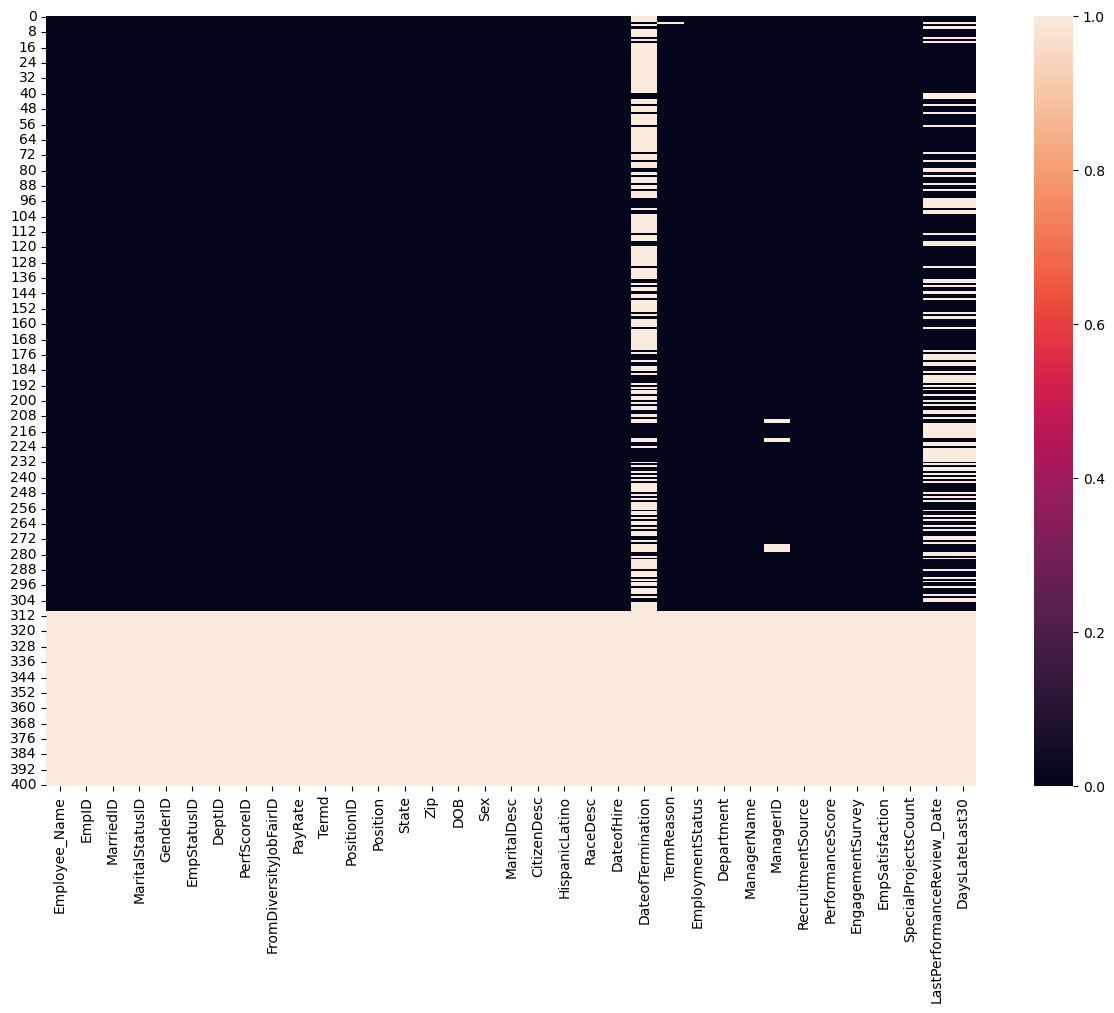

In [3]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [5]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)

<Axes: >

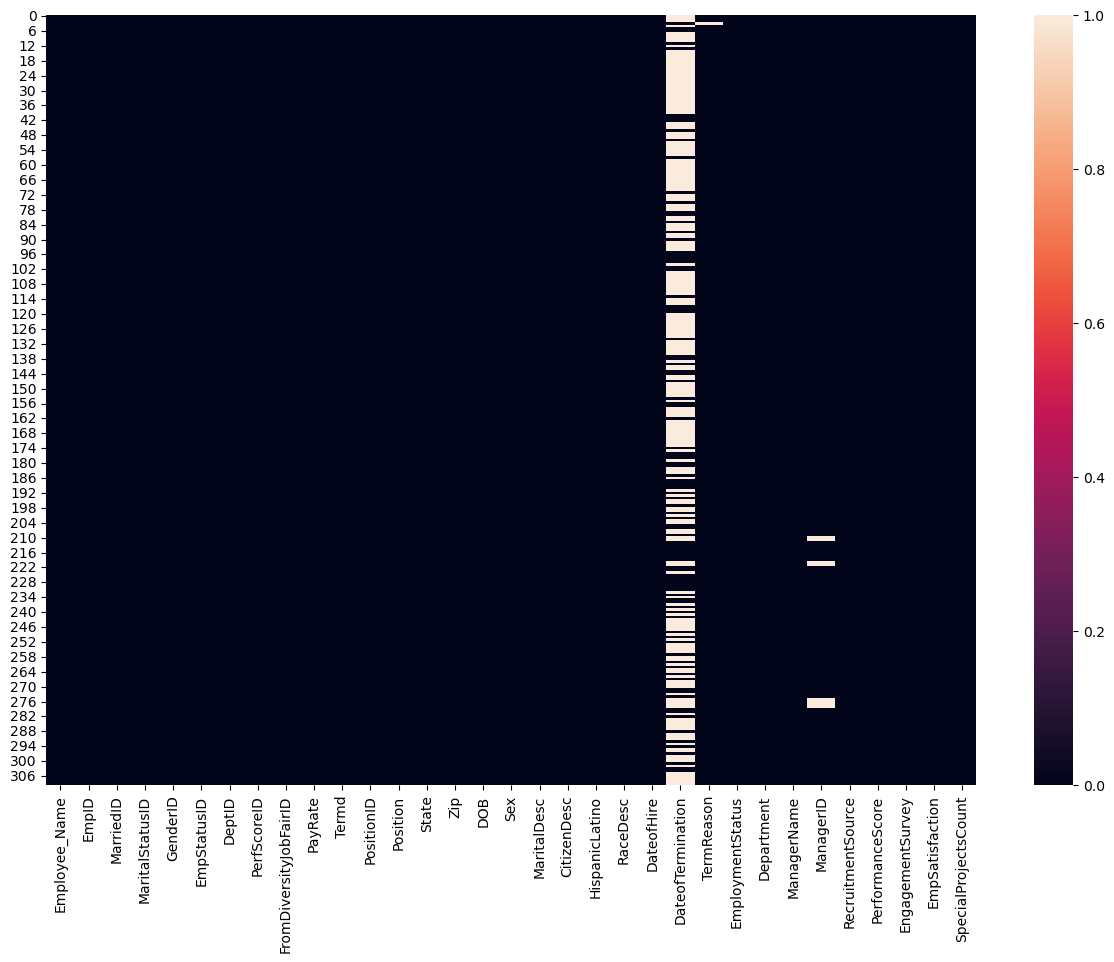

In [7]:
df.dropna(thresh=2,inplace=True)

plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [9]:
df[['DateofTermination','DOB','DateofHire']].dtypes

DateofTermination    object
DOB                  object
DateofHire           object
dtype: object

In [11]:
df[['DateofTermination','DOB','DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaN,11/24/87,10/27/2008
1,NaN,04/26/84,1/6/2014
2,NaN,09/01/86,9/29/2014
3,04/15/15,09/16/85,2/16/2015
4,NaN,05/19/88,5/1/2015


In [13]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

In [19]:
df[['DateofTermination','DOB','DateofHire']].head(25)

,DateofTermination,DOB,DateofHire
0,NaT,1987-11-24,2008-10-27
1,NaT,1984-04-26,2014-01-06
2,NaT,1986-09-01,2014-09-29
3,2015-04-15,1985-09-16,2015-02-16
4,NaT,1988-05-19,2015-05-01
5,2013-09-25,1987-06-14,2011-09-26
6,2014-08-02,2064-06-01,2011-08-15
7,NaT,2063-05-15,2014-08-18
8,NaT,1987-05-14,2012-02-20
9,NaT,1988-09-14,2014-08-18


In [21]:
# Korygowanie lat przyszłości
df['DOB'] = df['DOB'].apply(lambda x: x - pd.DateOffset(years=100) if x.year > 2019 else x)

In [23]:
df[['DateofTermination','DOB','DateofHire']].head(25)

,DateofTermination,DOB,DateofHire
0,NaT,1987-11-24,2008-10-27
1,NaT,1984-04-26,2014-01-06
2,NaT,1986-09-01,2014-09-29
3,2015-04-15,1985-09-16,2015-02-16
4,NaT,1988-05-19,2015-05-01
5,2013-09-25,1987-06-14,2011-09-26
6,2014-08-02,1964-06-01,2011-08-15
7,NaT,1963-05-15,2014-08-18
8,NaT,1987-05-14,2012-02-20
9,NaT,1988-09-14,2014-08-18
